# EA Assesment

**Arturo Sánchez Palacio**

For this task we will be using the following modules:

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's start by checking the files we are working with:

In [2]:
docs_dir = "./documents_challenge/"
documents = PlaintextCorpusReader(docs_dir, '.*') 

In [3]:
documents.fileids()

['APR/en/apr-book-0-en.txt',
 'APR/en/apr-book-1-en.txt',
 'APR/en/apr-book-10-en.txt',
 'APR/en/apr-book-100-en.txt',
 'APR/en/apr-book-1000-en.txt',
 'APR/en/apr-book-1001-en.txt',
 'APR/en/apr-book-1002-en.txt',
 'APR/en/apr-book-1005-en.txt',
 'APR/en/apr-book-1006-en.txt',
 'APR/en/apr-book-1007-en.txt',
 'APR/en/apr-book-101-en.txt',
 'APR/en/apr-book-1010-en.txt',
 'APR/en/apr-book-1011-en.txt',
 'APR/en/apr-book-1012-en.txt',
 'APR/en/apr-book-1015-en.txt',
 'APR/en/apr-book-1016-en.txt',
 'APR/en/apr-book-1017-en.txt',
 'APR/en/apr-book-102-en.txt',
 'APR/en/apr-book-1020-en.txt',
 'APR/en/apr-book-1021-en.txt',
 'APR/en/apr-book-1022-en.txt',
 'APR/en/apr-book-1025-en.txt',
 'APR/en/apr-book-1026-en.txt',
 'APR/en/apr-book-1027-en.txt',
 'APR/en/apr-book-1030-en.txt',
 'APR/en/apr-book-1031-en.txt',
 'APR/en/apr-book-1032-en.txt',
 'APR/en/apr-book-1035-en.txt',
 'APR/en/apr-book-1036-en.txt',
 'APR/en/apr-book-1037-en.txt',
 'APR/en/apr-book-1040-en.txt',
 'APR/en/apr-book-1

In [4]:
len(documents.fileids()) 

23128

Our corpus is composed by 23128 documents.
Let's explore a bit the distribution of these texts:

### Depending on the language

In [5]:
my_colors=['red', 'blue', 'green', 'yellow']

In [6]:
french = len([s for s in documents.fileids() if "/fr/" in s])
spanish = len([s for s in documents.fileids() if "/es/" in s])
english = len([s for s in documents.fileids() if "/en/" in s])

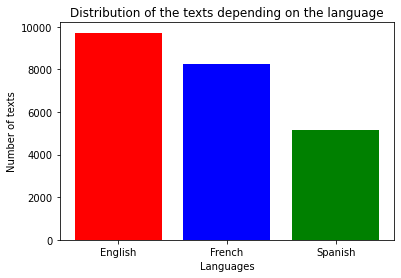

In [7]:
x_lan = ['English', 'French', 'Spanish']
freq_language = [english, french, spanish]
plt.bar(x_lan, freq_language, color=my_colors)
plt.xlabel("Languages")
plt.ylabel("Number of texts")
plt.title("Distribution of the texts depending on the language")
plt.show()

In [8]:
freq_language

[9724, 8236, 5168]

As we can see Spanish is the language with less representation (5168 texts) however English and French are quite close on representation (9274 vs 8326)

### Depending on the category

In [9]:
APR = len([s for s in documents.fileids() if "APR/" in s])
papers = len([s for s in documents.fileids() if "Conference_papers/" in s])
PAN = len([s for s in documents.fileids() if "PAN11/" in s])
wiki = len([s for s in documents.fileids() if "Wikipedia/" in s])

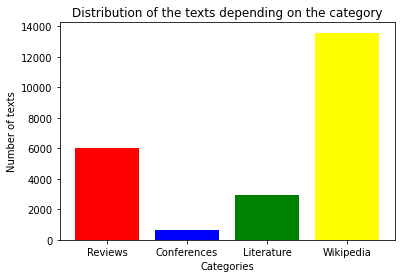

In [10]:
x_cat = ['Reviews', 'Conferences', 'Literature', 'Wikipedia']
freq_category = [APR, papers, PAN, wiki]
plt.bar(x_cat, freq_category, color=my_colors)
plt.xlabel("Categories")
plt.ylabel("Number of texts")
plt.title("Distribution of the texts depending on the category")
plt.show()

In [11]:
freq_category

[6000, 620, 2920, 13588]

The distribution seems to be quite reasonable when thinking about online data publicly available. Wikipedia articles are by far the most represented (13588 texts) while Conference papers are quite undersampled (only 620 texts).

Finally in order to check every category we perform a crossed analysis to see how the texts are distributed along the categories depending on the langauge:

In [10]:
APR = [s for s in documents.fileids() if "APR/" in s]
papers = [s for s in documents.fileids() if "Conference_papers/" in s]
PAN = [s for s in documents.fileids() if "PAN11/" in s]
wiki = [s for s in documents.fileids() if "Wikipedia/" in s]

In [11]:
category_names = ['APR', 'Papers', 'Literature', 'Wikipedia']
categories = [APR, papers, PAN, wiki]
plot_info = []
for category in categories:
    french  = len([s for s in category if "/fr/" in s])
    spanish = len([s for s in category if "/es/" in s])
    english = len([s for s in category if "/en/" in s])
    freq_language = [english, french, spanish]
    plot_info.append(freq_language)
x_lan = ['English', 'French', 'Spanish']

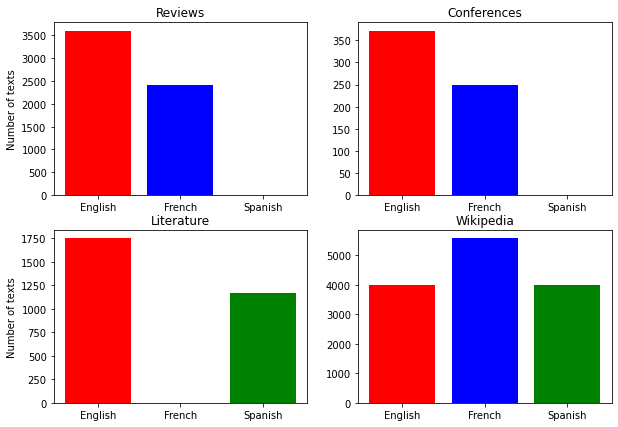

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
plt.title("Distribution of the texts depending on the category")
ax[0,0].bar(x_lan, plot_info[0], color=my_colors)
ax[0,0].title.set_text(x_cat[0])
ax[0,1].bar(x_lan, plot_info[1], color=my_colors)
ax[0,1].title.set_text(x_cat[1])
ax[1,0].bar(x_lan, plot_info[2], color=my_colors)
ax[1,0].title.set_text(x_cat[2])
ax[1,1].bar(x_lan, plot_info[3], color=my_colors)
ax[1,1].title.set_text(x_cat[3])
plt.setp(ax[:, 0], ylabel='Number of texts')
plt.show()

We can see that not every category has documents in every language. We also see that the distibution is relatively balanced in the present languages for every category. These information is used in order to decide how to tackle the two tasks required in this assignment. See the report attached in order to see how decisions were made.
